In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import time
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('spam_tfidf.csv', index_col=[0])
data.shape  # il dataset ha 4600 righe e 58 colonne
data.head()  # vediamo le prime 5 righe del dataset

,1,2,3,4,5,6,7,8,9,10,...,46,47,48,49,50,51,52,53,54,targhet
0,0.000000,1.04567,0.570084,0.0,0.309696,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.553776,0.000000,0.00000,1
1,0.309672,0.45748,0.445378,0.0,0.135492,0.427637,0.365548,0.120390,0.000000,1.186630,...,0.000000,0.0,0.0,0.00000,0.069628,0.0,0.264787,0.214164,0.08707,1
2,0.088478,0.00000,0.632436,0.0,1.190396,0.290182,0.330734,0.206383,1.141600,0.315593,...,0.131159,0.0,0.0,0.01762,0.075430,0.0,0.196455,0.218923,0.01814,1
3,0.000000,0.00000,0.000000,0.0,0.609715,0.000000,0.539619,1.083511,0.552962,0.795294,...,0.000000,0.0,0.0,0.00000,0.072265,0.0,0.097516,0.000000,0.00000,1
4,0.000000,0.00000,0.000000,0.0,0.609715,0.000000,0.539619,1.083511,0.552962,0.795294,...,0.000000,0.0,0.0,0.00000,0.071210,0.0,0.096092,0.000000,0.00000,1


In [6]:
# data processing
X = data.drop('targhet', axis=1)
y = data['targhet']  # colonna che segna se è o meno spam

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

Training time with C = 1.0: 1.579029
Prediction time: 0.737136
Miss-classified examples: 60
Accuracy: 0.935
Training time with C = 10.0: 0.835488
Prediction time: 0.382346
Miss-classified examples: 59
Accuracy: 0.936
Training time with C = 100.0: 0.595871
Prediction time: 0.238774
Miss-classified examples: 63
Accuracy: 0.932
Training time with C = 1000.0: 0.984563
Prediction time: 0.185140
Miss-classified examples: 70
Accuracy: 0.924
Training time with C = 10000.0: 2.105241
Prediction time: 0.188027
Miss-classified examples: 85
Accuracy: 0.908
Training time with C = 100000.0: 7.805647
Prediction time: 0.169110
Miss-classified examples: 83
Accuracy: 0.910
Training time with C = 1000000.0: 13.454797
Prediction time: 0.163206
Miss-classified examples: 81
Accuracy: 0.912
Training time with C = 10000000.0: 27.573796
Prediction time: 0.136223
Miss-classified examples: 83
Accuracy: 0.910


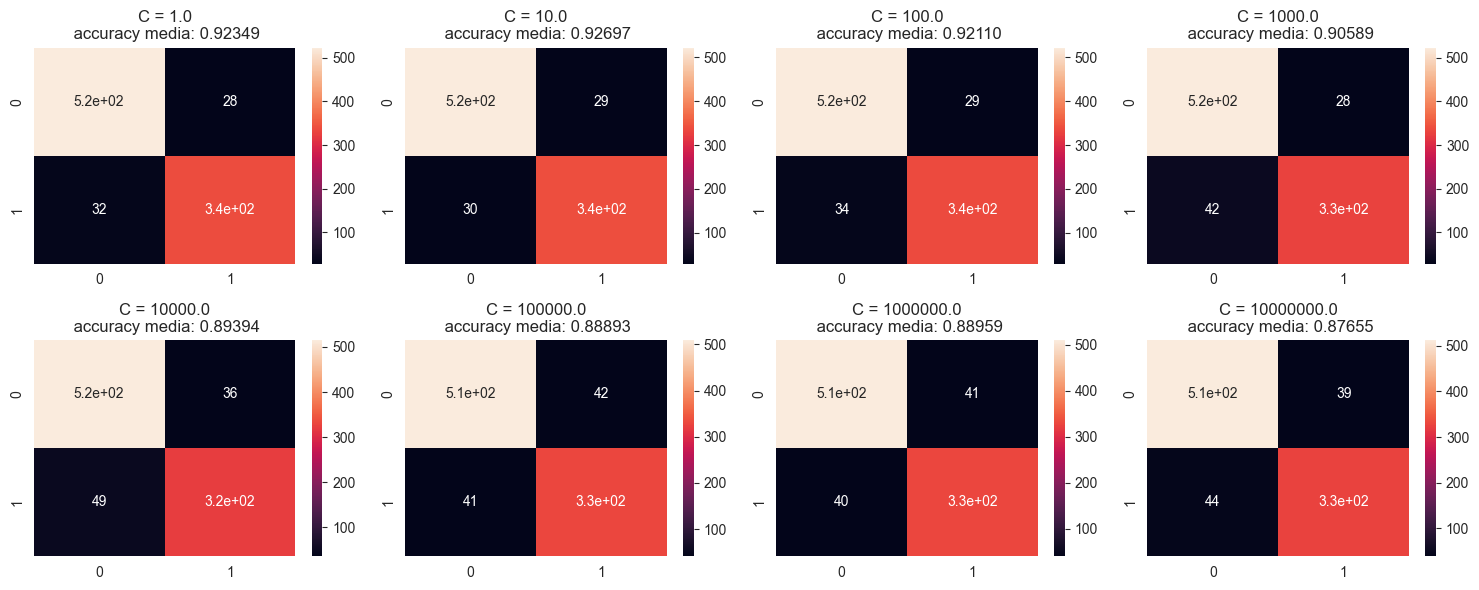

In [7]:
# qui faccio il learning

c: list = [1.0, 10.0, 100.0, 1000.0, 10000.0, 100000.0, 1000000.0, 10000000.0]
fis, axs = plt.subplots(2, 4, figsize=(15, 6))

for i in range(8):
    svcclassifier = SVC(kernel='rbf', C=c[i], gamma='auto')
    start_time = time.time()
    svcclassifier.fit(X_train, y_train)
    print(f'Training time with C = {c[i]}: %f' % (time.time() - start_time))
    start_time = time.time()
    y_predict = svcclassifier.predict(X_test)
    print('Prediction time: %f' % (time.time() - start_time))
    print('Miss-classified examples: %d' % (y_test != y_predict).sum())
    print('Accuracy: %.3f' % accuracy_score(y_test, y_predict))
    score = cross_val_score(svcclassifier, X, y, cv=10)
    cm = confusion_matrix(y_test, y_predict)
    sn.heatmap(cm, annot=True, ax=axs[int(i / 4), i % 4])
    axs[int(i / 4), i % 4].set_title('C = ' + str(c[i]) + '\n accuracy media: %.5f' %np.mean(score))
plt.tight_layout()
plt.show()

In [8]:
fis.savefig('confusion matrix per svm rbf_1.png', bbox_inches='tight')

Training time with C = 1e-05: 3.801174
Prediction time: 2.943321
Miss-classified examples: 189
Accuracy: 0.795
Training time with C = 0.0001: 0.729713
Prediction time: 0.678187
Miss-classified examples: 85
Accuracy: 0.908
Training time with C = 0.001: 0.473161
Prediction time: 0.470948
Miss-classified examples: 64
Accuracy: 0.931
Training time with C = 0.01: 0.671695
Prediction time: 0.591151
Miss-classified examples: 61
Accuracy: 0.934
Training time with C = 0.1: 1.109593
Prediction time: 0.710722
Miss-classified examples: 69
Accuracy: 0.925
Training time with C = 1.0: 2.570784
Prediction time: 1.283746
Miss-classified examples: 152
Accuracy: 0.835
Training time with C = 1.3: 1.934910
Prediction time: 0.950744
Miss-classified examples: 161
Accuracy: 0.825
Training time with C = 1.6: 2.498453
Prediction time: 1.008977
Miss-classified examples: 167
Accuracy: 0.819
Training time with C = 1.8: 1.962687
Prediction time: 0.953269
Miss-classified examples: 172
Accuracy: 0.813
Training time w

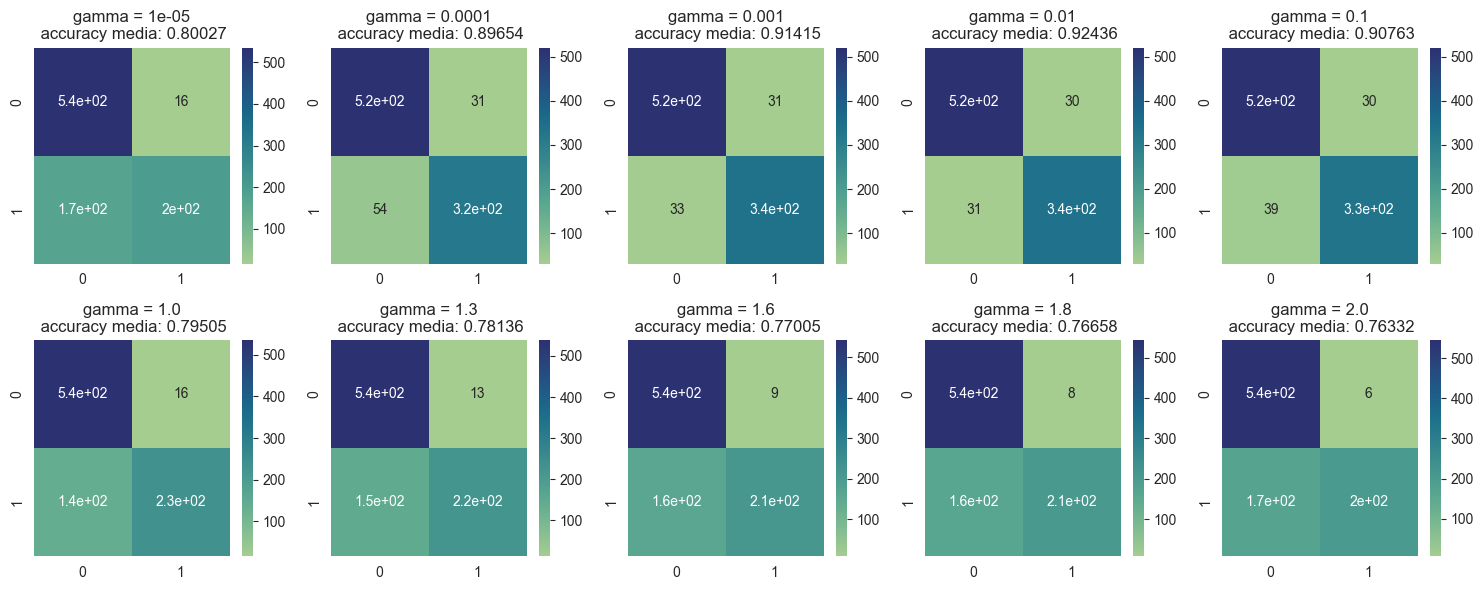

In [9]:
# qui faccio il learning
import numpy as np
c = [0.00001,0.0001, 0.001, 0.01, 0.1, 1.0, 1.3, 1.6, 1.8, 2.0]
fis, axs = plt.subplots(2, 5, figsize=(15, 6))

for i in range(10):
    svcclassifier = SVC(kernel='rbf', C=10, gamma=c[i])
    start_time = time.time()
    svcclassifier.fit(X_train, y_train)
    print(f'Training time with C = {c[i]}: %f' % (time.time() - start_time))
    start_time = time.time()
    y_predict = svcclassifier.predict(X_test)
    print('Prediction time: %f' % (time.time() - start_time))
    print('Miss-classified examples: %d' % (y_test != y_predict).sum())
    print('Accuracy: %.3f' % accuracy_score(y_test, y_predict))
    score = cross_val_score(svcclassifier, X, y, cv = 10)
    cm = confusion_matrix(y_test, y_predict)
    sn.heatmap(cm, annot=True, ax=axs[int(i / 5), i % 5],  cmap="crest")
    axs[int(i / 5), i % 5].set_title('gamma = ' + str(c[i]) + '\n accuracy media: %.5f' %np.mean(score))
plt.tight_layout()
plt.show()

In [10]:
fis.savefig('confusion matrix per svm rbf_2.png', bbox_inches='tight')